In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
%matplotlib notebook

csvpath = "Resources\CensusData.csv"

sales_df = pd.DataFrame(pd.read_csv(csvpath))
sales_df.head()

,Year,United States,South,West
0,1963,560,199,141
1,1964,565,200,129
2,1965,575,210,129
3,1966,461,166,99
4,1967,487,179,119


In [20]:
csvpath2= "Resources\FedData.csv"
rate_df = pd.DataFrame(pd.read_csv(csvpath2))
rate_df
unemploy_rate= rate_df.groupby(["Year"]).mean()['Unemployment Rate']
unemploy_rate_df = pd.DataFrame(unemploy_rate)
unemploy_rate_df.head()

,Unemployment Rate
Year,
1954,5.650000
1955,4.366667
1956,4.125000
1957,4.300000
1958,6.841667


In [3]:
sales_unemploy_df = pd.merge(sales_df,unemploy_rate_df, on="Year", how="outer")
sales_unemploy_df=sales_unemploy_df.rename(index=str, columns={'Unemployment Rate': 'National Unemployment Rate',
                                                               'South':'South Home Sales', 
                                                              'West': 'West Home Sales'})
sales_unemploy_df.head()

,Year,United States,South Home Sales,West Home Sales,National Unemployment Rate
0,1963,560.0,199.0,141.0,5.641667
1,1964,565.0,200.0,129.0,5.158333
2,1965,575.0,210.0,129.0,4.508333
3,1966,461.0,166.0,99.0,3.791667
4,1967,487.0,179.0,119.0,3.841667


In [4]:
csvpath3="Resources\SouthData.csv"
south_data = pd.DataFrame(pd.read_csv(csvpath3))
south_data.head()

,Year,South
0,1980,6.26
1,1981,6.85
2,1982,8.78
3,1983,9.02
4,1984,7.06


In [5]:
add_fl_df = pd.merge(sales_unemploy_df, south_data, on="Year", how="outer")
add_fl_df = add_fl_df.rename(index=str, columns={'South': 'South Unemployment Rate'})
add_fl_df.head()

,Year,United States,South Home Sales,West Home Sales,National Unemployment Rate,South Unemployment Rate
0,1963,560.0,199.0,141.0,5.641667,NaN
1,1964,565.0,200.0,129.0,5.158333,NaN
2,1965,575.0,210.0,129.0,4.508333,NaN
3,1966,461.0,166.0,99.0,3.791667,NaN
4,1967,487.0,179.0,119.0,3.841667,NaN


In [6]:
csvpath4 = "Resources\WestData.csv"
west_data = pd.DataFrame(pd.read_csv(csvpath4))
west_data.head()

,Year,West
0,1980,6.88
1,1981,7.42
2,1982,9.86
3,1983,9.52
4,1984,7.53


In [7]:
ca_fl_unemploy_data = pd.merge(add_fl_df, west_data, on="Year", how="outer")
ca_fl_unemploy_data = ca_fl_unemploy_data.rename(index=str, columns={'West': 'West Unemployment Rate'})
ca_fl_unemploy_data = ca_fl_unemploy_data.dropna(how="any")
ca_fl_unemploy_data.head()

,Year,United States,South Home Sales,West Home Sales,National Unemployment Rate,South Unemployment Rate,West Unemployment Rate
17,1980,545.0,267.0,145.0,7.175000,6.26,6.88
18,1981,436.0,219.0,112.0,7.616667,6.85,7.42
19,1982,412.0,219.0,99.0,9.708333,8.78,9.86
20,1983,623.0,323.0,152.0,9.600000,9.02,9.52
21,1984,639.0,309.0,160.0,7.508333,7.06,7.53


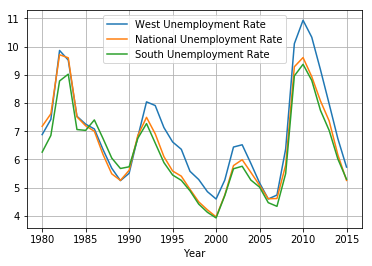

In [8]:
ca_fl_unemploy_data.plot("Year", ["West Unemployment Rate","National Unemployment Rate", "South Unemployment Rate"], kind="line")
plt.grid()


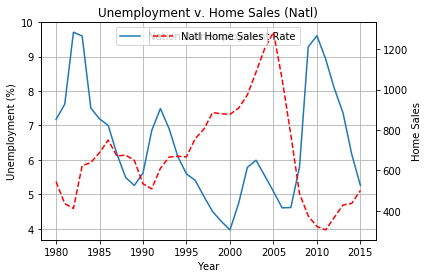

In [9]:
home_sales=[]
for sale in ca_fl_unemploy_data["United States"]:
    int_sale=int(sale)
    home_sales.append(int_sale)
fig, ax1=plt.subplots()
x=np.arange(1980,2016)
n=ca_fl_unemploy_data['National Unemployment Rate']
ax1.plot(x,n, label="National Unemployment Rate")
ax2=ax1.twinx()
ax2.plot(x,home_sales,color="r",linestyle="--", label='Natl Home Sales')
ax1.grid()
ax1.set_title('Unemployment v. Home Sales (Natl)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment (%)')
ax2.set_ylabel('Home Sales')
ax1.legend(loc="best")
ax2.legend(loc="upper center")
plt.savefig('Graph Images/Unemployment_Home_Sales.png')

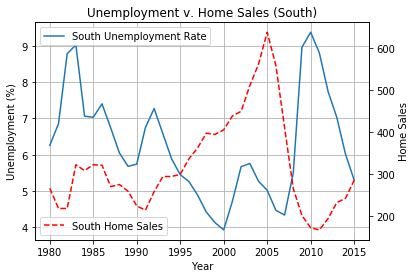

In [10]:
south_sales=[]
for sale in ca_fl_unemploy_data["South Home Sales"]:
    int_south_sale=int(sale)
    south_sales.append(int_south_sale)
fig, ax3=plt.subplots()
x=np.arange(1980,2016)
s=ca_fl_unemploy_data['South Unemployment Rate']
ax3.plot(x,s, label="South Unemployment Rate")
ax4=ax3.twinx()
ax4.plot(x,south_sales,color="r",linestyle="--", label='South Home Sales')
ax3.grid()
ax3.set_title('Unemployment v. Home Sales (South)')
ax3.set_xlabel('Year')
ax3.set_ylabel('Unemployment (%)')
ax4.set_ylabel('Home Sales')
ax3.legend(loc="upper left")
ax4.legend(loc="lower left")
plt.savefig('Graph Images/Unemployment_South_Sales.png')

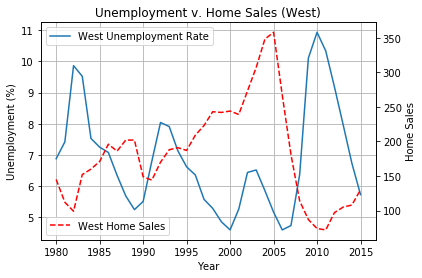

In [11]:
west_sales=[]
for sale in ca_fl_unemploy_data["West Home Sales"]:
    int_west_sale=int(sale)
    west_sales.append(int_west_sale)
fig, ax5=plt.subplots()
x=np.arange(1980,2016)
w=ca_fl_unemploy_data['West Unemployment Rate']
ax5.plot(x,w, label="West Unemployment Rate")
ax6=ax5.twinx()
ax6.plot(x,west_sales,color="r",linestyle="--", label='West Home Sales')
ax5.grid()
ax5.set_title('Unemployment v. Home Sales (West)')
ax5.set_xlabel('Year')
ax5.set_ylabel('Unemployment (%)')
ax6.set_ylabel('Home Sales')
ax5.legend(loc="upper left")
ax6.legend(loc="lower left")
plt.savefig('Graph Images/Unemployment_West_Sales.png')

In [12]:
#ttest of National Unemployment and National Home Sales
stats.ttest_ind(home_sales,ca_fl_unemploy_data['National Unemployment Rate'], equal_var=False )

Ttest_indResult(statistic=16.499255976324314, pvalue=4.37924258935584e-18)

In [13]:
#ttest of West Unemployment and West Home Sales
stats.ttest_ind(west_sales,ca_fl_unemploy_data['West Unemployment Rate'], equal_var=False )

Ttest_indResult(statistic=14.552026056945616, pvalue=2.018052542030696e-16)

In [14]:
#ttest of South Unemployment and South Home Sales
stats.ttest_ind(south_sales,ca_fl_unemploy_data['South Unemployment Rate'], equal_var=False )

Ttest_indResult(statistic=16.51519491933106, pvalue=4.225900660914583e-18)

,Year,United States,South Home Sales,West Home Sales,National Unemployment Rate,South Unemployment Rate,West Unemployment Rate
Year,1.000000,0.006196,0.141891,-0.025846,-0.159342,-0.151208,0.001631
United States,0.006196,1.000000,0.968780,0.987747,-0.666407,-0.671752,-0.676487
South Home Sales,0.141891,0.968780,1.000000,0.928441,-0.615096,-0.644910,-0.627698
West Home Sales,-0.025846,0.987747,0.928441,1.000000,-0.678275,-0.672823,-0.681447
National Unemployment Rate,-0.159342,-0.666407,-0.615096,-0.678275,1.000000,0.980590,0.965775
South Unemployment Rate,-0.151208,-0.671752,-0.644910,-0.672823,0.980590,1.000000,0.952488
West Unemployment Rate,0.001631,-0.676487,-0.627698,-0.681447,0.965775,0.952488,1.000000


In [22]:
print(ca_fl_unemploy_data['South Home Sales'].corr(ca_fl_unemploy_data['South Unemployment Rate']),
ca_fl_unemploy_data['West Home Sales'].corr(ca_fl_unemploy_data['West Unemployment Rate']),
ca_fl_unemploy_data['United States'].corr(ca_fl_unemploy_data['National Unemployment Rate']))

-0.6449103431397425 -0.6814470807072108 -0.6664071297074259


In [26]:

unemp_post_TwoK= ca_fl_unemploy_data[24:37]
print(unemp_post_TwoK['South Home Sales'].corr(unemp_post_TwoK['South Unemployment Rate']),
unemp_post_TwoK['West Home Sales'].corr(unemp_post_TwoK['West Unemployment Rate']),
unemp_post_TwoK['United States'].corr(unemp_post_TwoK['National Unemployment Rate']))

-0.7588415854949673 -0.7026181706044661 -0.7171962337825063


In [27]:

unemp_pre_TwoK= ca_fl_unemploy_data[0:24]
print(unemp_pre_TwoK['South Home Sales'].corr(unemp_pre_TwoK['South Unemployment Rate']),
unemp_pre_TwoK['West Home Sales'].corr(unemp_pre_TwoK['West Unemployment Rate']),
unemp_pre_TwoK['United States'].corr(unemp_pre_TwoK['National Unemployment Rate']))

-0.5354642664862953 -0.6196643052311452 -0.6405202323619851
